### Predicting Loan Defaults (Classification Problem)

#### Business Understanding
Lending Club is a company that gives personal and business loans online. People can apply for loans, and Lending Club decides how risky each loan is. Then, investors can choose which loans they want to put their money into. The main challenges are figuring out how risky a loan might be, deciding how much interest to charge, finding out which loans might not be paid back, and helping investors pick a variety of loans to spread out their risk.

#### Business Objectives
###### Improve Risk Assessment: 
Make a better system to understand how risky each loan is by looking at the borrower's information and the loan details.
###### Set the Right Interest Rates: 
Use data to suggest interest rates that are fair and make sense based on how risky the loan is.
###### Predict Loan Defaults: 
Create a tool that can guess which loans might not be paid back, helping to avoid losses.
###### Help Investors Choose: 
Offer advice to investors on how to spread their investments across different types of loans to get a good balance of risk and reward.
###### Better Loans and Policies:
Look for trends in the data to make loans and rules better for attracting more borrowers while keeping risks low.

By focusing on these goals, Lending Club can make better loan decisions, offer fair interest rates, reduce the chance of loans not being paid back, and provide better advice to investors, making the lending and investing process clearer and more effective for everyone involved.

In [1]:
import pandas as pd
import time
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, GridSearchCV

In [2]:
df = pd.read_csv("data/loan.csv", low_memory=False)
df = df.dropna(subset=["loan_status"])
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,2500,2500,2500.0,36 months,13.56,84.92,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,30000,30000,30000.0,60 months,18.94,777.23,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,5000,5000,5000.0,36 months,17.97,180.69,D,D1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,4000,4000,4000.0,36 months,18.94,146.51,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,30000,30000,30000.0,60 months,16.14,731.78,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#reduce the data size to fasten following steps
data = df.sample(n=100000, random_state=42)

In [4]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None) 
pd.set_option('display.width', 1000) 
pd.set_option('display.max_colwidth', None) 

#### Exploratory Data Analysis (EDA)

The goal is to:

###### Understand the Data: 
Learn what kind of information is in your dataset and how it's organized.
###### Clean the Data: 
Fix any mistakes or missing parts in the data.
###### Find Patterns: 
Look for trends or connections between different parts of the data.
###### Find Anything Odd: 
Notice any data points that don't fit the pattern, as they could be mistakes or something interesting.
###### Ready for More Analysis: 
Decide what parts of the data might be useful for deeper study or building models.



In [5]:
data.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,url,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,0.0,0.0,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,0.0,99928.000000,99998.000000,99998.000000,48729.000000,15910.000000,99998.000000,99998.000000,100000.000000,99938.000000,99998.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,99994.000000,25728.000000,100000.0,5366.000000,5365.000000,99998.000000,96903.000000,9.690300e+04,61698.000000,61698.000000,61698.000000,61698.00000,59739.000000,6.169800e+04,52604.000000,61698.000000,61698.000000,61698.000000,61694.000000,9.690300e+04,61698.000000,61698.000000,61698.000000,97794.000000,96902.000000,96678.000000,96621.000000,99994.000000,99998.000000,93797.000000,96903.000000,96903.000000,96903.000000,97794.000000,96741.000000,22934.000000,86708.000000,32703.000000,96903.000000,96903.000000,96903.000000,97420.000000,96903.000000,96903.000000,96903.000000,96903.000000,96903.000000,97420.000000,93241.000000,96903.000000,96903.000000,96903.000000,96898.000000,96658.000000,99938.000000,99996.000000,9.690300e+04,9.779400e+04,97794.000000,9.690300e+04,4791.000000,4791.000000,4791.000000,4791.000000,4704.000000,4791.000000,4791.000000,4791.000000,4791.000000,1610.000000,475.0,475.000000,475.0,475.000000,385.000000,475.000000,475.000000,1463.000000,1463.000000,1463.000000
mean,NaN,NaN,15031.287250,15027.200250,15009.932143,13.110404,445.918598,7.765991e+04,NaN,18.825358,0.303146,0.576232,34.722506,72.756820,11.612132,0.198084,16621.688980,50.434147,24.159233,4467.946713,4466.990124,11795.587364,11778.701821,9272.496481,2386.985332,1.504707e+00,134.600842,22.379423,3350.994122,0.017641,44.371541,1.0,123736.569499,19.408267,0.003780,233.271911,1.415164e+05,0.934568,2.773137,0.668514,1.55817,21.183130,3.537000e+04,69.265018,1.291014,2.738760,5820.974748,57.093575,3.446405e+04,1.012691,1.476968,2.029952,4.516749,13483.985274,11397.602340,57.944867,0.008230,11.323586,125.527256,181.075426,14.029215,8.314201,1.542590,24.913150,39.415933,7.034334,35.868636,0.504525,3.671672,5.620621,4.768969,7.724508,8.428294,8.242686,13.992663,5.567175,11.626606,0.000622,0.002446,0.080833,2.074776,94.121045,42.454695,0.128139,0.047152,1.769534e+05,

In [6]:
data.dtypes

id                                            float64
member_id                                     float64
loan_amnt                                       int64
funded_amnt                                     int64
funded_amnt_inv                               float64
term                                           object
int_rate                                      float64
installment                                   float64
grade                                          object
sub_grade                                      object
emp_title                                      object
emp_length                                     object
home_ownership                                 object
annual_inc                                    float64
verification_status                            object
issue_d                                        object
loan_status                                    object
pymnt_plan                                     object
url                         

Data Cleaning:

1. Remove Exclusions
2. Remove Outliers.
3. Impute Missing Values

In [7]:
def map_emp_length(emp_length):
    """
    Maps employment length to a numerical value.
    """
    emp_length_mapping = {
        '10+ years': 10,
        '9 years': 9,
        '8 years': 8,
        '7 years': 7,
        '6 years': 6,
        '5 years': 5,
        '4 years': 4,
        '3 years': 3,
        '2 years': 2,
        '1 year': 1,
        '< 1 year': 0.5,
        'n/a': 0
    }
    return emp_length_mapping.get(emp_length, 0)  # Default to 0 if not found

def map_state_to_region(state):
    """
    Maps a state to its corresponding region.
    """
    state_to_region = {
        **dict.fromkeys(['CA', 'OR', 'UT', 'WA', 'CO', 'NV', 'AK', 'MT', 'HI', 'WY', 'ID'], 'West'),
        **dict.fromkeys(['AZ', 'TX', 'NM', 'OK'], 'SouthWest'),
        **dict.fromkeys(['GA', 'NC', 'VA', 'FL', 'KY', 'SC', 'LA', 'AL', 'WV', 'DC', 'AR', 'DE', 'MS', 'TN'], 'SouthEast'),
        **dict.fromkeys(['IL', 'MO', 'MN', 'OH', 'WI', 'KS', 'MI', 'SD', 'IA', 'NE', 'IN', 'ND'], 'MidWest'),
        **dict.fromkeys(['CT', 'NY', 'PA', 'NJ', 'RI', 'MA', 'MD', 'VT', 'NH', 'ME'], 'NorthEast')
    }
    return state_to_region.get(state, 'Unknown')  # Default to 'Unknown' if not found


In [8]:
data['emp_length_int'] = data['emp_length'].apply(map_emp_length)
data['region'] = data['addr_state'].apply(map_state_to_region)

# Display the head of the DataFrame, transposed for better readability
data.head().transpose()

,1758049,686533,900721,1727912,539691
id,NaN,NaN,NaN,NaN,NaN
member_id,NaN,NaN,NaN,NaN,NaN
loan_amnt,35000,30000,15000,24000,14400
funded_amnt,35000,30000,15000,24000,14400
funded_amnt_inv,35000.0,30000.0,15000.0,24000.0,14400.0
term,36 months,60 months,36 months,60 months,36 months
int_rate,12.12,10.75,7.49,21.15,8.59
installment,1164.51,648.54,466.53,651.31,455.18
grade,B,B,A,E,A
sub_grade,B3,B4,A4,E2,A5


In [9]:
missing_values_count = data.isnull().sum()

# Calculating the percentage of missing values in each column
missing_values_percentage = (data.isnull().sum() / len(data)) * 100

# Combining both counts and percentages into a single DataFrame for a clearer view
missing_values_df = pd.DataFrame({'Missing Values': missing_values_count, 'Percentage (%)': missing_values_percentage})

# Sorting the DataFrame by the percentage of missing values in descending order
missing_values_df_sorted = missing_values_df.sort_values(by='Percentage (%)', ascending=False)

missing_values_df_sorted



,Missing Values,Percentage (%)
id,100000,100.000
member_id,100000,100.000
url,100000,100.000
orig_projected_additional_accrued_interest,99615,99.615
hardship_length,99525,99.525
hardship_type,99525,99.525
hardship_reason,99525,99.525
deferral_term,99525,99.525
hardship_amount,99525,99.525
hardship_start_date,99525,99.525


In [10]:
# Identify columns where the percentage of missing values is greater than 80%
columns_to_drop = missing_values_percentage[missing_values_percentage > 50].index

# Drop these columns from the DataFrame
data.drop(columns=columns_to_drop, inplace=True)

# Verify the columns have been dropped
print(data.columns)

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       ...
       'tax_liens', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit', 'total_il_high_credit_limit', 'hardship_flag', 'disbursement_method', 'debt_settlement_flag', 'emp_length_int', 'region'], dtype='object', length=103)


In [11]:
# Drop the columns which add no value to the outcome
no_value_columns = [
    'collection_recovery_fee',
    'last_pymnt_amnt',
    'out_prncp',
    'out_prncp_inv',
    'recoveries',
    'total_pymnt',
    'total_pymnt_inv',
    'total_rec_int',
    'total_rec_late_fee',
    'total_rec_prncp'
]

data.drop(no_value_columns, axis=1, inplace=True)

In [12]:
missing_values_count = data.isnull().sum()

# Calculating the percentage of missing values in each column
missing_values_percentage = (data.isnull().sum() / len(data)) * 100

# Combining both counts and percentages into a single DataFrame for a clearer view
missing_values_df = pd.DataFrame({'Missing Values': missing_values_count, 'Percentage (%)': missing_values_percentage})

# Sorting the DataFrame by the percentage of missing values in descending order
missing_values_df_sorted = missing_values_df.sort_values(by='Percentage (%)', ascending=False)

missing_values_df_sorted

,Missing Values,Percentage (%)
il_util,47396,47.396
mths_since_rcnt_il,40261,40.261
all_util,38306,38.306
open_rv_24m,38302,38.302
inq_fi,38302,38.302
total_cu_tl,38302,38.302
inq_last_12m,38302,38.302
open_rv_12m,38302,38.302
total_bal_il,38302,38.302
max_bal_bc,38302,38.302


In [13]:
#drop repeated features

data.drop(['emp_length','emp_title','title','zip_code','issue_d','earliest_cr_line','addr_state'], axis=1, inplace=True)

# unique values a categorical variable (object) has
data.select_dtypes(include=["object"]).nunique()  #include/exclude

term                      2
grade                     7
sub_grade                35
home_ownership            6
verification_status       3
loan_status               9
pymnt_plan                2
purpose                  14
initial_list_status       2
last_pymnt_d            131
last_credit_pull_d      121
application_type          2
hardship_flag             2
disbursement_method       2
debt_settlement_flag      2
region                    5
dtype: int64

In [14]:
distinct_terms = data['term'].unique()
print("Distinct values of 'term':", distinct_terms)

Distinct values of 'term': [' 36 months' ' 60 months']


In [15]:
# Convert 'term' into numeric by extracting the number of months
data['term'] = data['term'].str.extract('(\d+)').astype(float)

# Verifying the conversion by displaying the unique values of the new numeric column
unique_terms_numeric = data['term'].unique()
unique_terms_numeric

array([36., 60.])

In [16]:
unique_loan_status_counts = data['loan_status'].value_counts()

unique_loan_status_counts

loan_status
Fully Paid                                             46031
Current                                                40767
Charged Off                                            11530
Late (31-120 days)                                       978
In Grace Period                                          400
Late (16-30 days)                                        178
Does not meet the credit policy. Status:Fully Paid        80
Does not meet the credit policy. Status:Charged Off       35
Default                                                    1
Name: count, dtype: int64

In [17]:
data['loan_status'] = data['loan_status'].apply(lambda x: 1 if x in ['Fully Paid', 'Current','Does not meet the credit policy. Status:Fully Paid'] else 0)

In [18]:

# for object variables - Get the mode of next payment date and last payment date and the last date credit amount was pulled
for column in ["last_pymnt_d", "last_credit_pull_d"]:  #, 'income_category'
    data[column] = data.groupby("region")[column].transform(lambda x: x.fillna(x.mode()))

# for numerical variables
# Get the mode on the number of accounts in which the borrower is delinquent
data["pub_rec"] = data.groupby("region")["pub_rec"].transform(lambda x: x.fillna(x.median()))
# Get the mode of the total number of credit lines the borrower has
data["total_acc"] = data.groupby("region")["total_acc"].transform(lambda x: x.fillna(x.median()))

data["emp_length_int"] = data.groupby("region")["emp_length_int"].transform(lambda x: x.fillna(x.median()))

# Get the mean of the annual income depending on the region the borrower is located.
data["annual_inc"] = data.groupby("region")["annual_inc"].transform(lambda x: x.fillna(x.mean()))
# Mode of credit delinquencies in the past two years.
data["delinq_2yrs"] = data.groupby("region")["delinq_2yrs"].transform(lambda x: x.fillna(x.mean()))

In [19]:
data.fillna(0, inplace=True)
data.isnull().sum().max()

0

In [20]:
#Removing outliers
# Define a dictionary with columns as keys and their respective outlier thresholds as values
outlier_thresholds = {
    'annual_inc': 250000,
    'dti': 50,
    'open_acc': 40,
    'total_acc': 80,
    'revol_util': 120,
    'revol_bal': 250000
}

print("Dataset before removing outliers:", data.shape)

# Apply the outlier removal criteria for each column in the dictionary
for column, threshold in outlier_thresholds.items():
    data = data[data[column] <= threshold]

# Reset index after removing outliers
data.reset_index(drop=True, inplace=True)

print("Dataset after removing outliers:", data.shape)

# Display the head of the DataFrame, transposed for better readability
data.head().transpose()

Dataset before removing outliers: (100000, 86)
Dataset after removing outliers: (98016, 86)


,0,1,2,3,4
loan_amnt,35000,30000,15000,24000,14400
funded_amnt,35000,30000,15000,24000,14400
funded_amnt_inv,35000.0,30000.0,15000.0,24000.0,14400.0
term,36.0,60.0,36.0,60.0,36.0
int_rate,12.12,10.75,7.49,21.15,8.59
installment,1164.51,648.54,466.53,651.31,455.18
grade,B,B,A,E,A
sub_grade,B3,B4,A4,E2,A5
home_ownership,RENT,RENT,OWN,RENT,MORTGAGE
annual_inc,90000.0,100000.0,100000.0,58000.0,90000.0


In [21]:
unique_loan_status_counts = data['loan_status'].value_counts()

unique_loan_status_counts

loan_status
1    85060
0    12956
Name: count, dtype: int64

In [22]:
loan_status_counts = data['loan_status'].value_counts(normalize=True) * 100

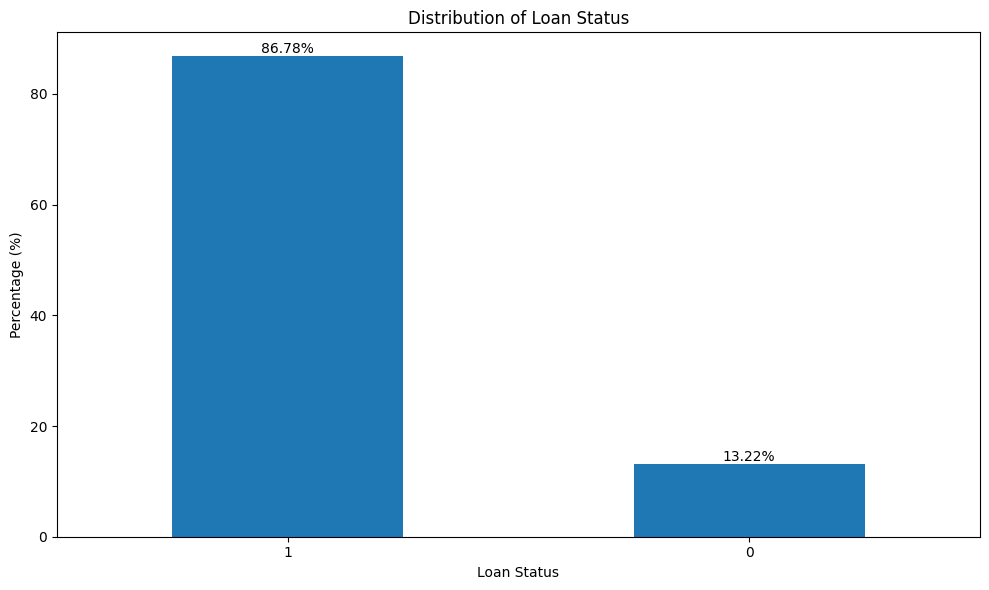

In [23]:
# Plotting the histogram with percentages
plt.figure(figsize=(10, 6))
loan_status_counts.plot(kind='bar')
plt.title('Distribution of Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=360)

# Annotating the bars with the percentage values
for index, value in enumerate(loan_status_counts):
    plt.text(index, value, f"{value:.2f}%", ha='center', va='bottom')

plt.tight_layout()
plt.show()

#####
From the above distribution, we can see that there are about 11.5% of the loans which were bad(defaulted) in the overall data

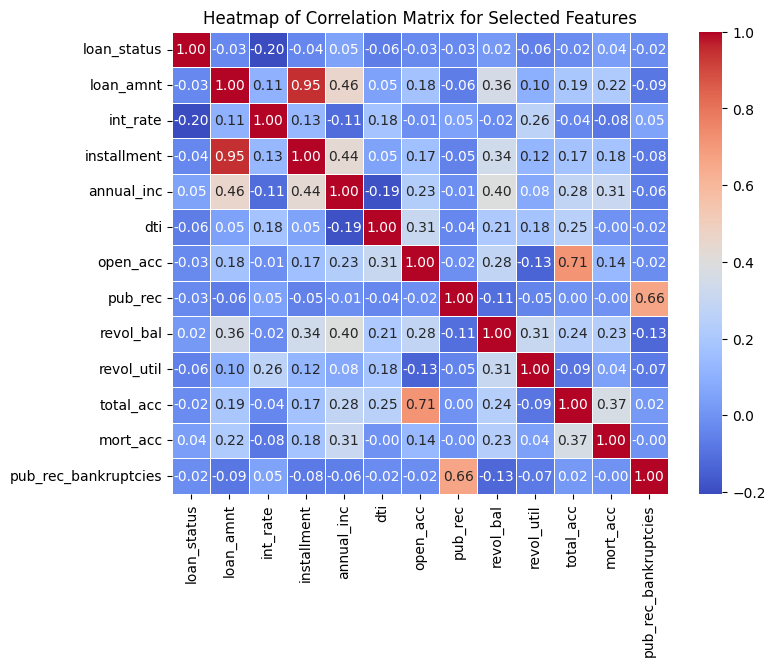

In [24]:
# Attempting with a commonly relevant subset for loan data analysis
subset_columns = ['loan_status','loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc', 'pub_rec','revol_bal', 'revol_util','total_acc','mort_acc','pub_rec_bankruptcies']

# Plotting the heatmap again with the reduced set of features
plt.figure(figsize=(8, 6))
sns.heatmap(data[subset_columns].corr(), cmap='coolwarm', annot=True, fmt=".2f", linewidths=.5)
plt.title('Heatmap of Correlation Matrix for Selected Features')
plt.show()


From the heatmap, there is a very good correlation 
1. Between "loan_amnt" the "installment" feature. 
2. Between loan_amnt and also the annual_inc but this might be irrevalant because higher income means higher loan amount.
3. 

installment: Monthly payment by borrower.
loan_amnt: The loan taken by borrower.
annual_inc: Borrower annual income

In [25]:
data['loan_status_str'] = data['loan_status'].map({0: 'Bad', 1: 'Good'})


In [26]:
loan_status_percentages = data['loan_status_str'].value_counts(normalize=True) * 100


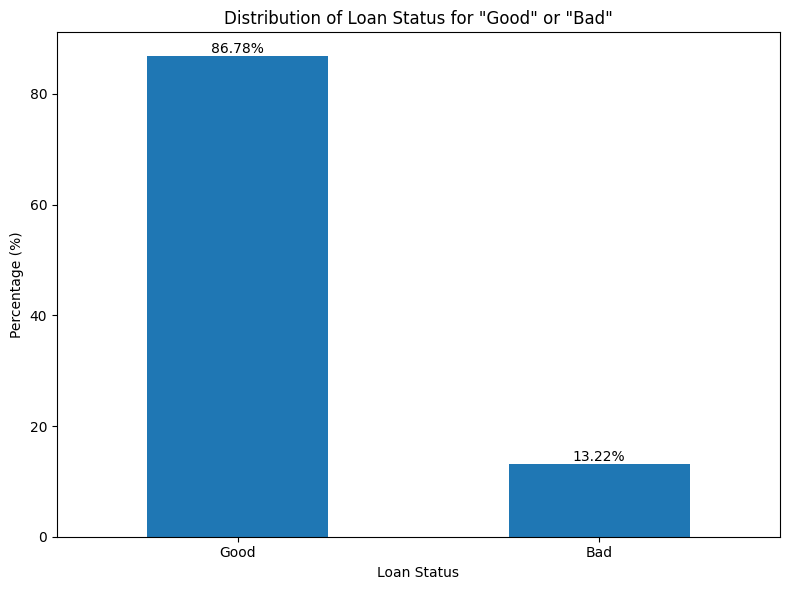

In [27]:
# Plotting
plt.figure(figsize=(8, 6))
loan_status_percentages.plot(kind='bar')
plt.title('Distribution of Loan Status for "Good" or "Bad"')
plt.xlabel('Loan Status')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=0)

# Annotate with the percentage values
for index, value in enumerate(loan_status_percentages):
    plt.text(index, value, f"{value:.2f}%", ha='center', va='bottom')

plt.tight_layout()
plt.show()

##### I'll Focus on variables such as loan amount, interest rate, term, grade, employment length, annual income, and debt-to-income ratio to compare the characteristics of loans that are "Charged Off" to those that are "Fully Paid"

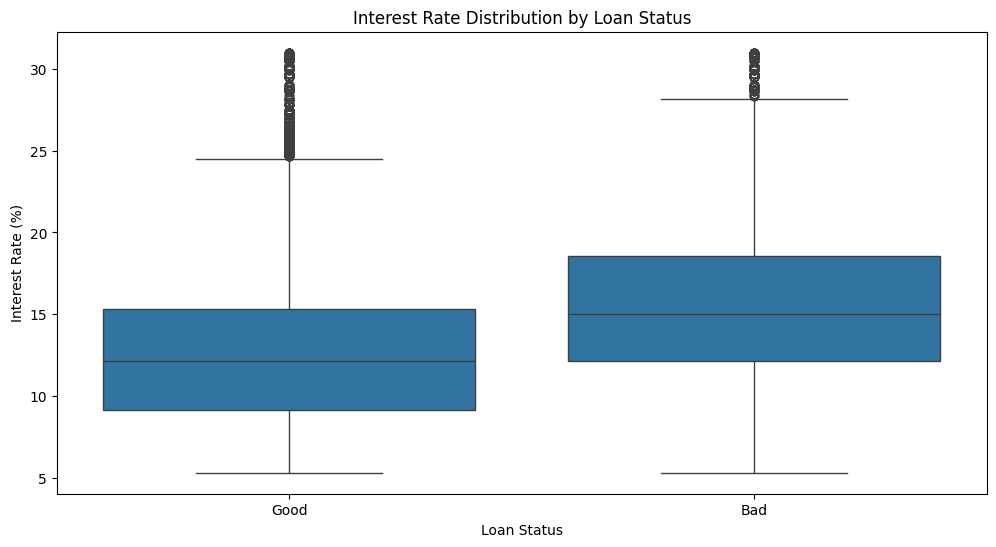

In [28]:
# Comparing Interest Rates between 'Fully Paid' and 'Charged Off'
plt.figure(figsize=(12, 6))
sns.boxplot(x='loan_status_str', y='int_rate', data=data)
plt.title('Interest Rate Distribution by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Interest Rate (%)')
plt.show()



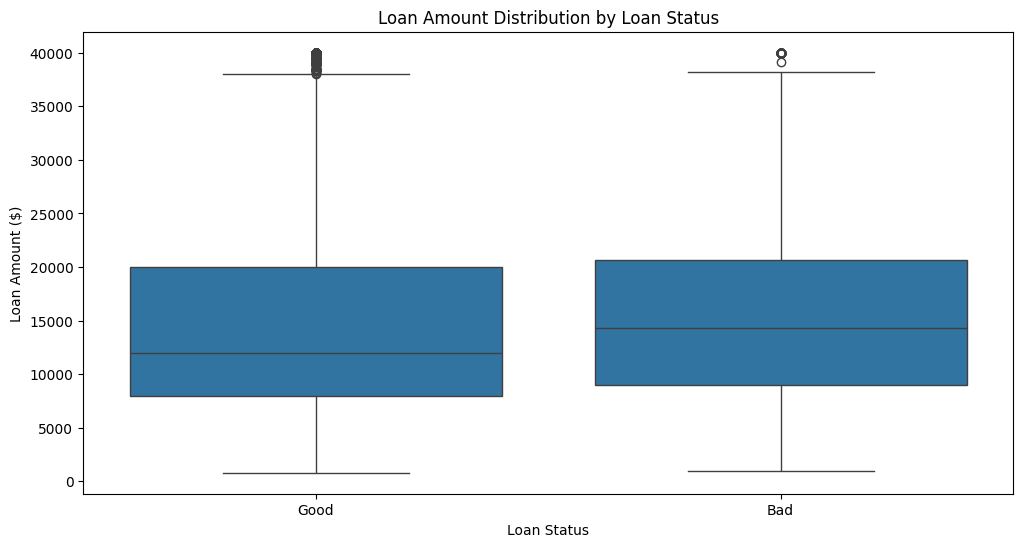

In [29]:
# Comparing Loan Amounts between 'Fully Paid' and 'Charged Off'
plt.figure(figsize=(12, 6))
sns.boxplot(x='loan_status_str', y='loan_amnt', data=data)
plt.title('Loan Amount Distribution by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount ($)')
plt.show()



The above observations suggest that interest rate is a significant factor in the risk of default, while the amount of the loan also has an impact but to a lesser extent. 

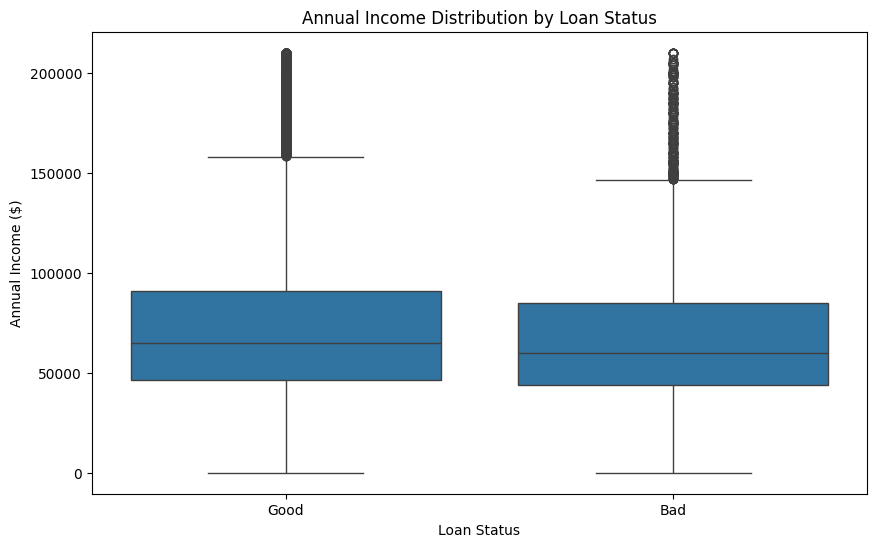

In [30]:
annual_inc_99th = data['annual_inc'].quantile(0.99)

filtered_data_for_plot = data[data['annual_inc'] <= annual_inc_99th]

# Plotting loan status against annual_inc
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status_str', y='annual_inc', data=filtered_data_for_plot)
plt.title('Annual Income Distribution by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Annual Income ($)')

plt.show()

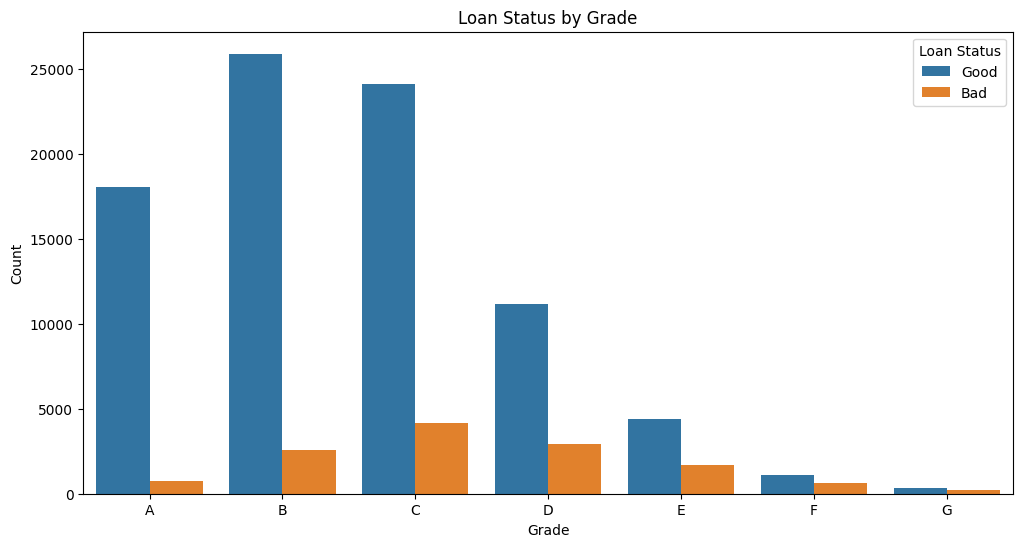

In [31]:
# Using a count plot to show loan status by grade
plt.figure(figsize=(12, 6))
sns.countplot(x='grade', hue='loan_status_str', data=data, order=sorted(data['grade'].unique()))
plt.title('Loan Status by Grade')
plt.xlabel('Grade')
plt.ylabel('Count')
plt.legend(title='Loan Status')

plt.show()

In [32]:
status_by_grade = data.groupby(['grade', 'loan_status_str']).size().unstack(fill_value=0)

# Calculating the percentage of 'Fully Paid' vs 'Charged Off' in each grade
status_by_grade['Total'] = status_by_grade.sum(axis=1)
status_by_grade['Good (%)'] = (status_by_grade['Good'] / status_by_grade['Total']) * 100
status_by_grade['Bad (%)'] = (status_by_grade['Bad'] / status_by_grade['Total']) * 100

status_by_grade[['Good (%)', 'Bad (%)']]

loan_status_str,Good (%),Bad (%)
grade,,
A,96.050671,3.949329
B,91.019332,8.980668
C,85.287251,14.712749
D,79.173156,20.826844
E,71.965080,28.034920
F,63.744344,36.255656
G,60.550459,39.449541


The above observations suggest that loan grade is a significant factor in the risk of default, lower the grade, higher default.

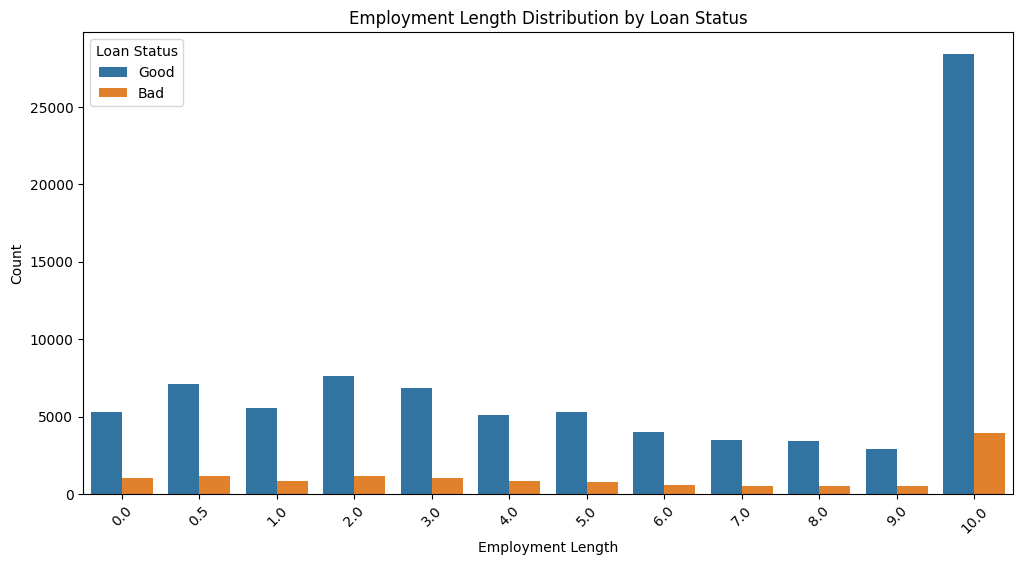

In [33]:
data_nonan = data.dropna(subset=['emp_length_int'])

# Plotting 'emp_length_int' against 'loan_status_str' for the filtered
plt.figure(figsize=(12, 6))
sns.countplot(x='emp_length_int', hue='loan_status_str', data=data_nonan,
              order=sorted(data_nonan['emp_length_int'].unique(), key=lambda x: (len(str(x)), x)))
plt.title('Employment Length Distribution by Loan Status')
plt.xlabel('Employment Length')
plt.ylabel('Count')
plt.legend(title='Loan Status')
plt.xticks(rotation=45)
plt.show()

In [34]:
grouped_counts = data.groupby(['emp_length_int', 'loan_status_str']).size().unstack()

grouped_counts['Total'] = grouped_counts.sum(axis=1)

#Calculate percentages for 'Fully Paid' and 'Charged Off'
grouped_counts['Good (%)'] = (grouped_counts['Good'] / grouped_counts['Total']) * 100
grouped_counts['Bad (%)'] = (grouped_counts['Bad'] / grouped_counts['Total']) * 100

print(grouped_counts[['Good (%)', 'Bad (%)']])

loan_status_str   Good (%)    Bad (%)
emp_length_int                       
0.0              83.356863  16.643137
0.5              86.063480  13.936520
1.0              86.942226  13.057774
2.0              86.788595  13.211405
3.0              86.573781  13.426219
4.0              86.214479  13.785521
5.0              87.367374  12.632626
6.0              87.581985  12.418015
7.0              86.821323  13.178677
8.0              86.074672  13.925328
9.0              85.473071  14.526929
10.0             87.758003  12.241997


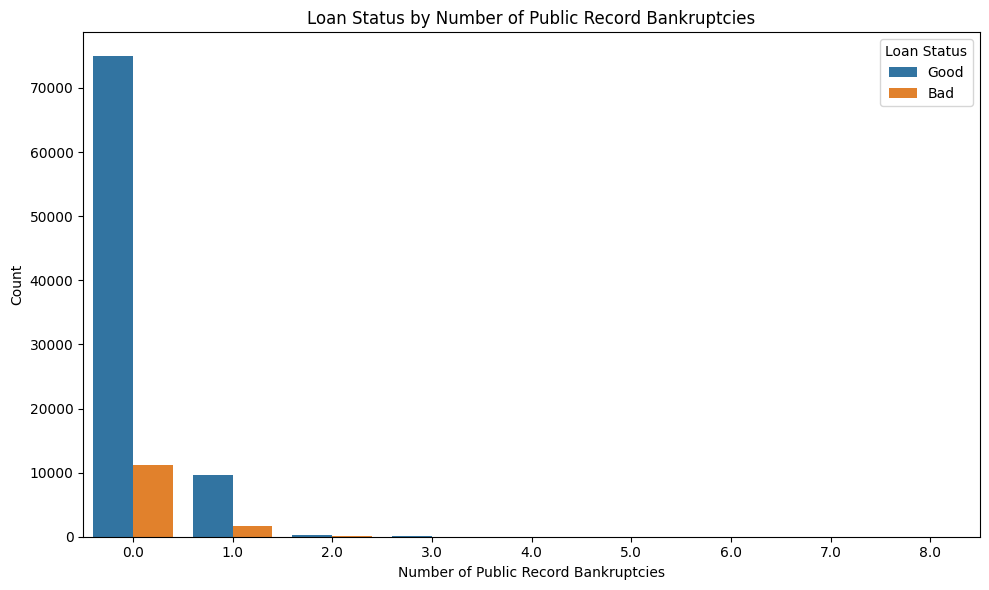

In [35]:
# Step 3: Create the count plot
plt.figure(figsize=(10, 6))
sns.countplot(x='pub_rec_bankruptcies', hue='loan_status_str', data=data)
plt.title('Loan Status by Number of Public Record Bankruptcies')
plt.xlabel('Number of Public Record Bankruptcies')
plt.ylabel('Count')
plt.legend(title='Loan Status')
plt.tight_layout()
plt.show()

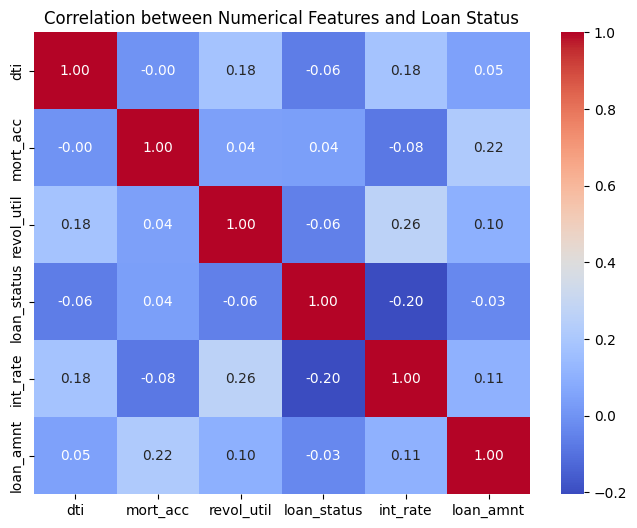

In [36]:
# Selecting relevant columns for correlation calculation
selected_columns = data[['dti', 'mort_acc', 'revol_util', 'loan_status', 'int_rate','loan_amnt']]

# Step 2: Calculate correlations
correlation_matrix = selected_columns.corr()

# Step 3: Visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation between Numerical Features and Loan Status')
plt.show()

## Conclusion:
There are two type of features:

1. Applicant Features like occupation, employment details, etc.
2. Loan Features, like rate, amount, purpose etc.


#### The most important feature remains:
1. Interest Rate
2. DTI (Debt to Income Ratio)
3. Utilization of Revolving accounts
2. Higher Annual income means low changes of defaults.
3. Lower loan grade means high defaults.
4. If there is a past bankruptcy, then the chances are higher for the bankruptcy

In [37]:
#Handle categorical variables via encoding, first I'll try with Ordinal Encoding 
categorical_cols = data.select_dtypes(include=['object', 'category']).columns

In [38]:
categorical_cols

Index(['grade', 'sub_grade', 'home_ownership', 'verification_status', 'pymnt_plan', 'purpose', 'initial_list_status', 'last_pymnt_d', 'last_credit_pull_d', 'application_type', 'hardship_flag', 'disbursement_method', 'debt_settlement_flag', 'region', 'loan_status_str'], dtype='object')

In [39]:
# Filter the DataFrame for categorical columns
categorical_columns = data.select_dtypes(include=['object', 'category'])


columns_with_limited_values = data.nunique().loc[lambda x: x.isin([2, 3,4,5])]

unique_values = {col: data[col].unique() for col in columns_with_limited_values.index}

unique_values

{'term': array([36., 60.]),
 'verification_status': array(['Verified', 'Source Verified', 'Not Verified'], dtype=object),
 'loan_status': array([1, 0]),
 'pymnt_plan': array(['n', 'y'], dtype=object),
 'initial_list_status': array(['w', 'f'], dtype=object),
 'application_type': array(['Individual', 'Joint App'], dtype=object),
 'acc_now_delinq': array([0., 1., 2., 3.]),
 'num_tl_120dpd_2m': array([0., 1., 2., 3.]),
 'num_tl_30dpd': array([0., 1., 2., 3.]),
 'hardship_flag': array(['N', 'Y'], dtype=object),
 'disbursement_method': array(['Cash', 'DirectPay'], dtype=object),
 'debt_settlement_flag': array(['N', 'Y'], dtype=object),
 'region': array(['SouthWest', 'NorthEast', 'SouthEast', 'MidWest', 'West'],
       dtype=object),
 'loan_status_str': array(['Good', 'Bad'], dtype=object)}

In [40]:
# Dictionary for ordinal encoding
ordinal_mappings = {
    'term': {'36.': 36, '60.': 60},
    'verification_status': {'Not Verified': 0, 'Source Verified': 1, 'Verified': 2},
    'pymnt_plan': {'n': 0, 'y': 1},
    'initial_list_status': {'w': 0, 'f': 1},
    'application_type': {'Individual': 0, 'Joint App': 1},
    'acc_now_delinq': {'0.': 0, '1.': 1,'2.': 2, '3.': 3},
    'num_tl_120dpd_2m': {'0.': 0, '1.': 1,'2.': 2, '3.': 3},
    'num_tl_30dpd': {'0.': 0, '1.': 1,'2.': 2, '3.': 3},
    'hardship_flag': {'N': 0, 'Y': 1},
    'disbursement_method': {'Cash': 0, 'DirectPay': 1},
    'debt_settlement_flag': {'N': 0, 'Y': 1},
    'loan_status_str': {'Good': 0, 'Bad': 1},
    'home_ownership': {'RENT': 0, 'OWN': 1,'MORTGAGE': 2, 'ANY': 3,'OTHER': 4, 'NONE': 5}
}

pd.set_option('future.no_silent_downcasting', True)

# Applying ordinal encoding
for col, mapping in ordinal_mappings.items():
    data[col] = data[col].replace(mapping).astype(int)
    

In [42]:
# Using pandas get_dummies for one-hot encoding
categorical_columns = ['grade', 'sub_grade', 'purpose', 'last_pymnt_d', 'last_credit_pull_d', 'region']
data_encoded = pd.get_dummies(data, columns=categorical_columns)

In [43]:
data_encoded.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag,emp_length_int,loan_status_str,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,sub_grade_A1,sub_grade_A2,sub_grade_A3,sub_grade_A4,sub_grade_A5,sub_grade_B1,sub_grade_B2,sub_grade_B3,sub_grade_B4,sub_grade_B5,sub_grade_C1,sub_grade_C2,sub_grade_C3,sub_grade_C4,sub_grade_C5,sub_grade_D1,sub_grade_D2,sub_grade_D3,sub_grade_D4,sub_grade_D5,sub_grade_E1,sub_grade_E2,sub_grade_E3,sub_grade_E4,sub_grade_E5,sub_grade_F1,sub_grade_F2,sub_grade_F3,sub_grade_F4,sub_grade_F5,sub_grade_G1,sub_grade_G2,sub_grade_G3,sub_grade_G4,sub_grade_G5,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,last_pymnt_d_0,last_pymnt_d_Apr-2008,last_pymnt_d_Apr-2009,last_pymnt_d_Apr-2010,last_pymnt_d_Apr-2011,last_pymnt_d_Apr-2012,last_pymnt_d_Apr-2013,last_pymnt_d_Apr-2014,last_pymnt_d_Apr-2015,last_pymnt_d_Apr-2016,last_pymnt_d_Apr-2017,last_pymnt_d_Apr-2018,last_pymnt_d_Aug-2008,last_pymnt_d_Aug-2009,last_pymnt_d_Aug-2010,last_pymnt_d_Aug-2011,last_pymnt_d_Aug-2012,last_pymnt_d_Aug-2013,last_pymnt_d_Aug-2014,last_pymnt_d_Aug-2015,last_pymnt_d_Aug-2016,last_pymnt_d_Aug-2017,last_pymnt_d_Aug-2018,last_pymnt_d_Dec-2008,last_pymnt_d_Dec-2009,last_pymnt_d_Dec-2010,last_pymnt_d_Dec-2011,last_pymnt_d_Dec-2012,last_pymnt_d_Dec-2013,last_pymnt_d_Dec-2014,last_pymnt_d_Dec-2015,last_pymnt_d_Dec-2016,last_pymnt_d_Dec-2017,last_pymnt_d_Dec-2018,last_pymnt_d_Feb-2009,last_pymnt_d_Feb-2010,last_pymnt_d_Feb-2011,last_pymnt_d_Feb-2012,last_pymnt_d_Feb-2013,last_pymnt_d_Feb-2014,last_pymnt_d_Feb-2015,last_pymnt_d_Feb-2016,last_pymnt_d_Feb-2017,last_pymnt_d_Feb-2018,last_pymnt_d_Feb-2019,last_pymnt_d_Jan-2008,last_pymnt_d_Jan-2009,last_pymnt_d_Jan-2010,last_pymnt_d_Jan-2011,last_pymnt_d_Jan-2012,last_pymnt_d_Jan-2013,last_pymnt_d_Jan-2014,last_pymnt_d_Jan-2015,last_pymnt_d_Jan-2016,last_pymnt_d_Jan-2017,last_pymnt_d_Jan-2018,last_pymnt_d_Jan-2019,last_pymnt_d_Jul-2008,last_pymnt_d_Jul-2009,last_pymnt_d_Jul-2010,last_pymnt_d_Jul-2011,last_pymnt_d_Jul-2012,last_pymnt_d_Jul-2013,last_pymnt_d_Jul-2014,last_pymnt_d_Jul-2015,last_pymnt_d_Jul-2016,last_pymnt_d_Jul-2017,last_pymnt_d_Jul-2018,last_pymnt_d_Jun-2009,last_pymnt_d_Jun-2010,last_pymnt_d_Jun-2011,last_pymnt_d_Jun-2012,last_pymnt_d_Jun-2013,last_pymnt_d_Jun-2014,last_pymnt_d_Jun-2015,last_pymnt_d_Jun-2016,last_pymnt_d_Jun-2017,last_pymnt_d_Jun-2018,last_pymnt_d_Mar-2009,last_pymnt_d_Mar-2010,last_pymnt_d_Mar-2011,last_pymnt_d_Mar-2012,last_pymnt_d_Mar-2013,last_pymnt_d_Mar-2014,last_pymnt_d_Mar-2015,last_pymnt_d_Mar-2016,last_pymnt_d_Mar-2017,last_pymnt_d_Mar-2018,last_pymnt_d_May-2008,last_pymnt_d_May-2009,last_pymnt_d_May-2010,last_pymnt_d_May-2011,last_pymnt_d_May-2012,last_pymnt_d_May

In [44]:
X = data_encoded.drop(['loan_status','loan_status_str'], axis = 1)
y = data_encoded['loan_status']

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42, shuffle=True)


In [46]:
rfc = RandomForestClassifier(n_jobs=4, random_state=42, criterion='gini', n_estimators=100, verbose=False)


In [47]:
rfc.fit(X_train, y_train)

RandomForestClassifier(n_jobs=4, random_state=42, verbose=False)

In [48]:

rfc_preds = rfc.predict(X_test)


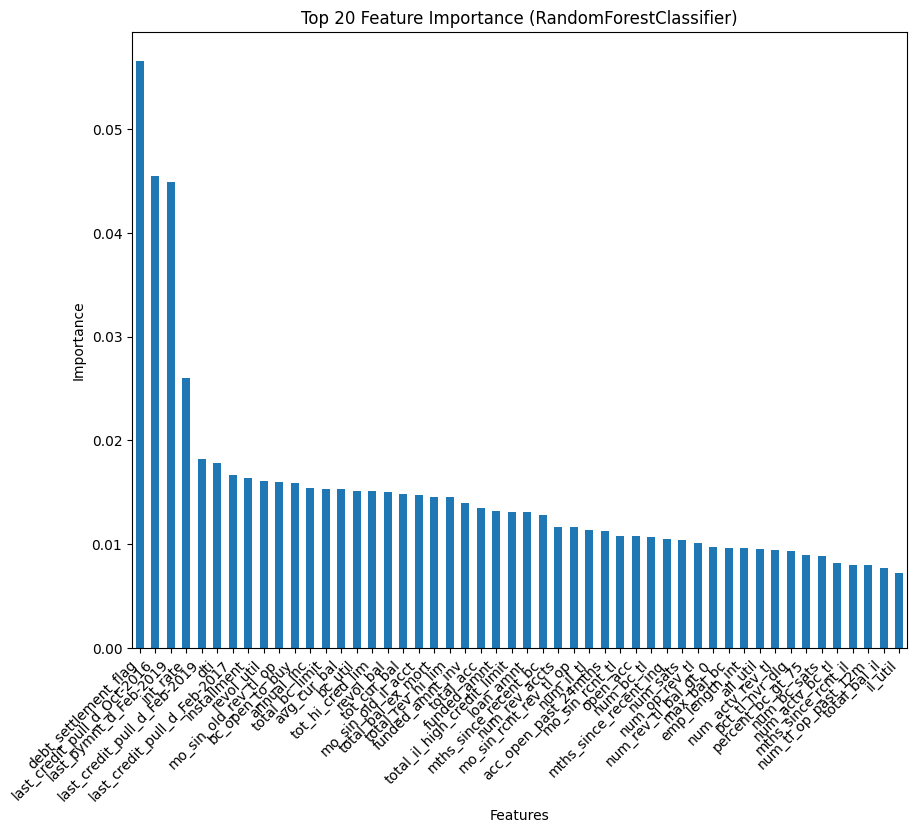

In [49]:
feature_importances = rfc.feature_importances_

feature_names = X_train.columns

importances = pd.Series(feature_importances, index=feature_names).sort_values(ascending=False)

top_20_importances = importances[:50]

# Plotting
plt.figure(figsize=(10,8))
top_20_importances.plot(kind='bar')
plt.title('Top 20 Feature Importance (RandomForestClassifier)')
plt.ylabel('Importance')
plt.xlabel('Features')
plt.xticks(rotation=45, ha='right')
plt.show()


In [50]:
# Random Forest Classifier, Using GridSearchCV to find the hyperparameters best values
rfc_pipe = Pipeline([('rfc', RandomForestClassifier())])
param_grid = {'rfc__n_estimators': [100, 200, 300],
              'rfc__max_features': ['sqrt', None], 
              'rfc__max_depth': range(1, 4, 6),
              'rfc__max_leaf_nodes': [3, 6, 9]
         }
rfc_grid = GridSearchCV(estimator=rfc_pipe, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='accuracy')


rfc_grid_start = time.time()
rfc_grid.fit(X_train, y_train)
rfc_grid_stop = time.time()
print(f'Grid Search Time : {(rfc_grid_stop - rfc_grid_start): .8f}s')

Fitting 3 folds for each of 18 candidates, totalling 54 fits
Grid Search Time :  123.79732990s


In [52]:
# Best parameter set found by GridSearch
print("Best parameters:", rfc_grid.best_params_)

# Best estimator
best_rf = rfc_grid.best_estimator_


Best parameters: {'rfc__max_depth': 1, 'rfc__max_features': None, 'rfc__max_leaf_nodes': 3, 'rfc__n_estimators': 100}
